In [1]:
# External classes
from BufferGeometry import BufferGeometry
from GeometryUtils import *

import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as la


import warnings
warnings.filterwarnings('ignore')

## Test prompt

In [2]:
volumes, gd, cos_sim, mean_vector, word_counts, rank_matrix = general_analysis("prompts.txt")
gd_heatmap = get_heatmap("prompts.txt")

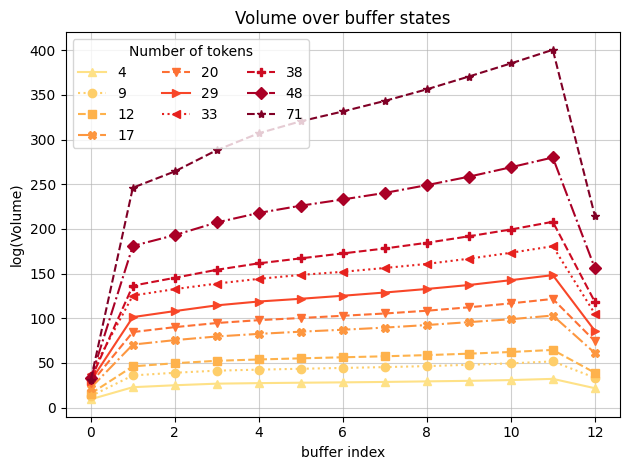

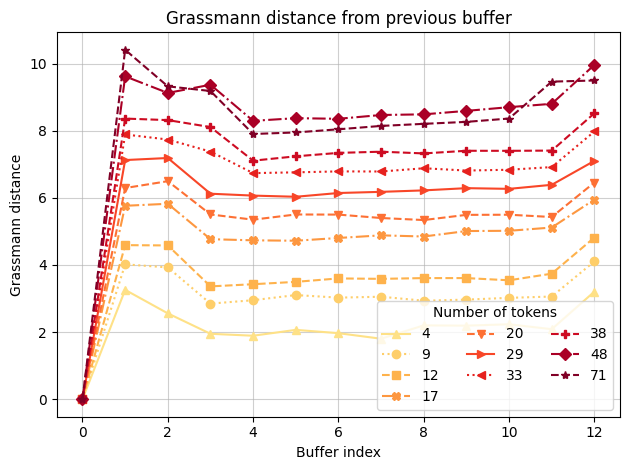

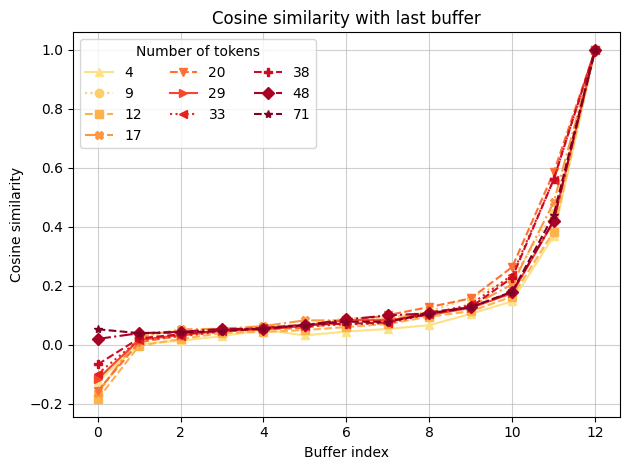

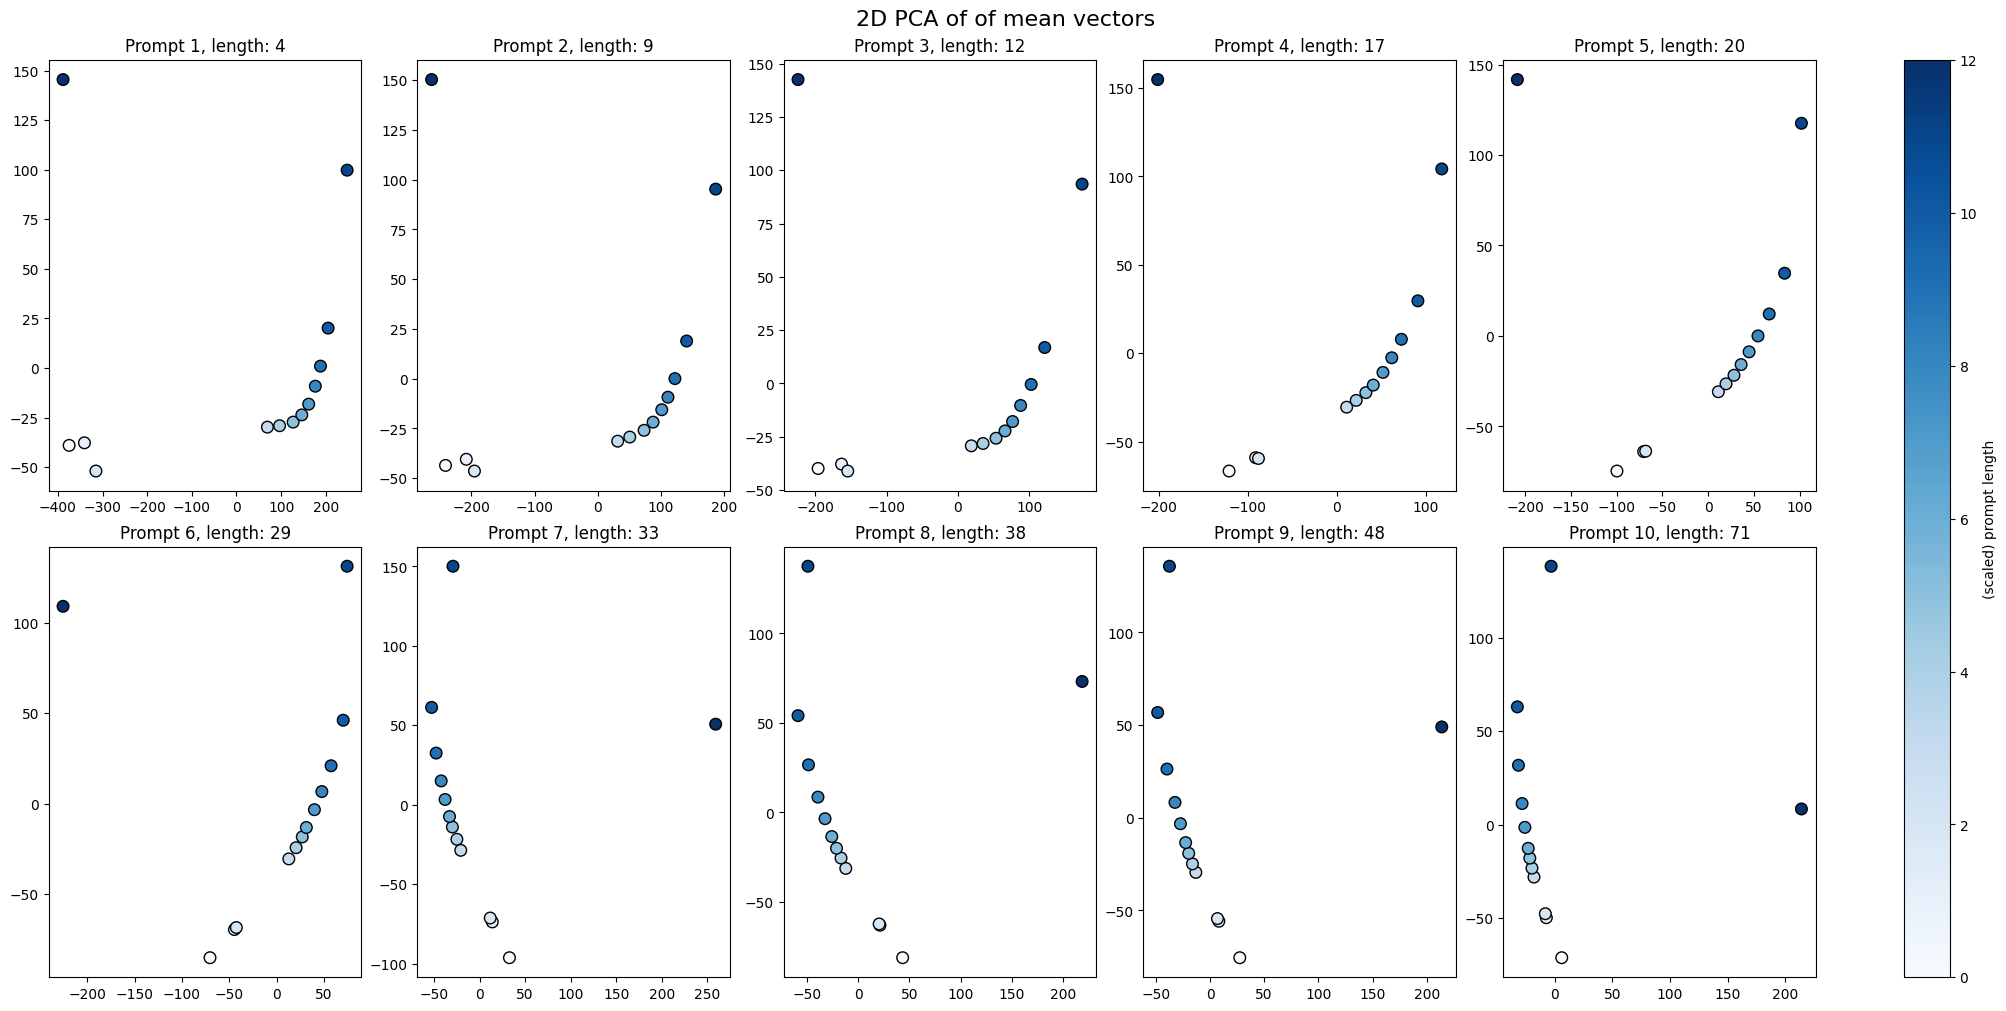

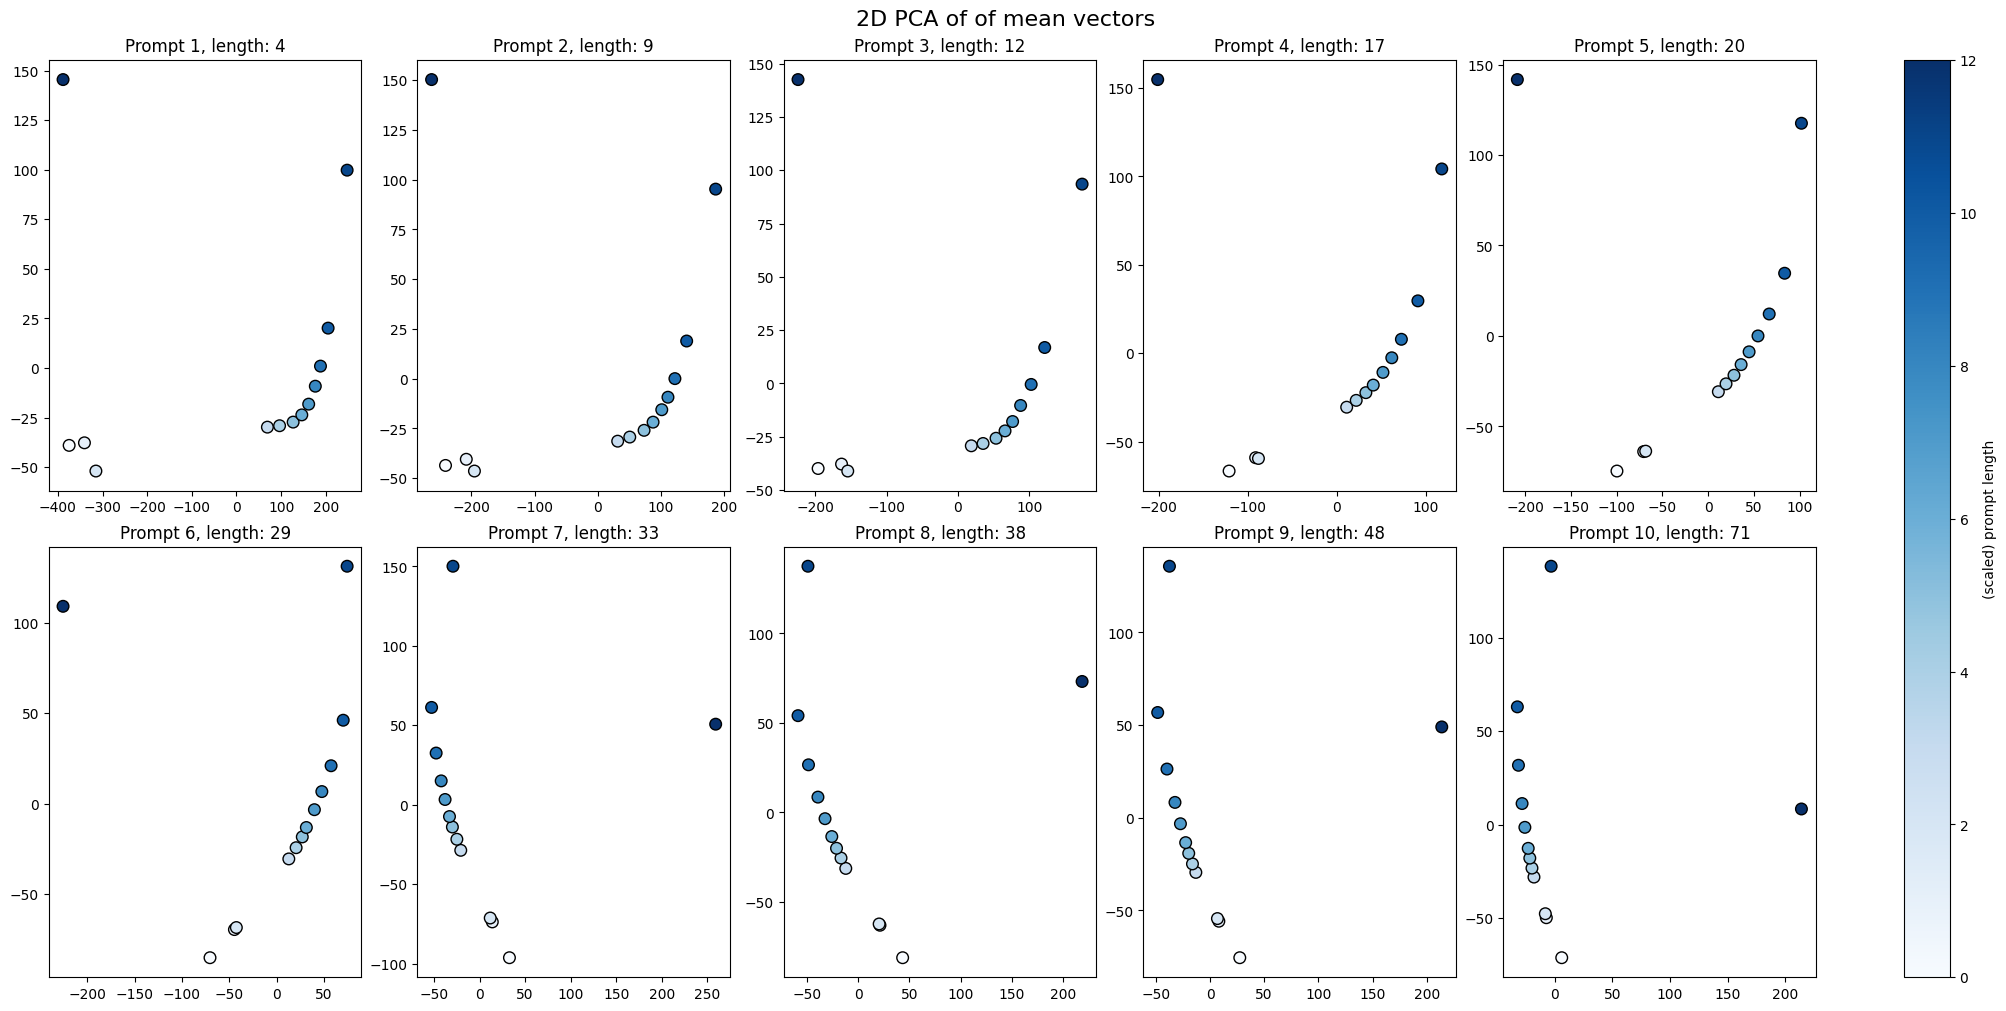

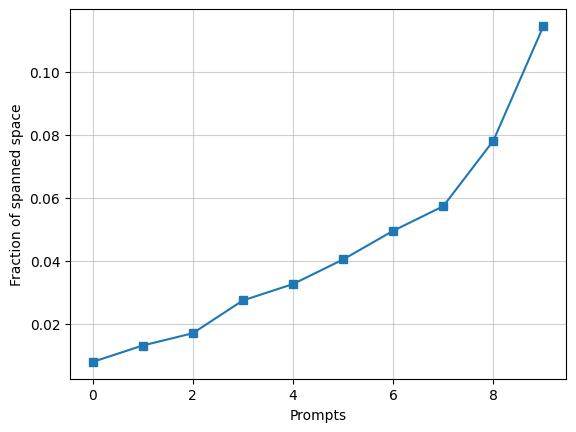

/Users/giacomogasparotto/POD/transformer_geometrical_analysis/GeometryUtils.py:284: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


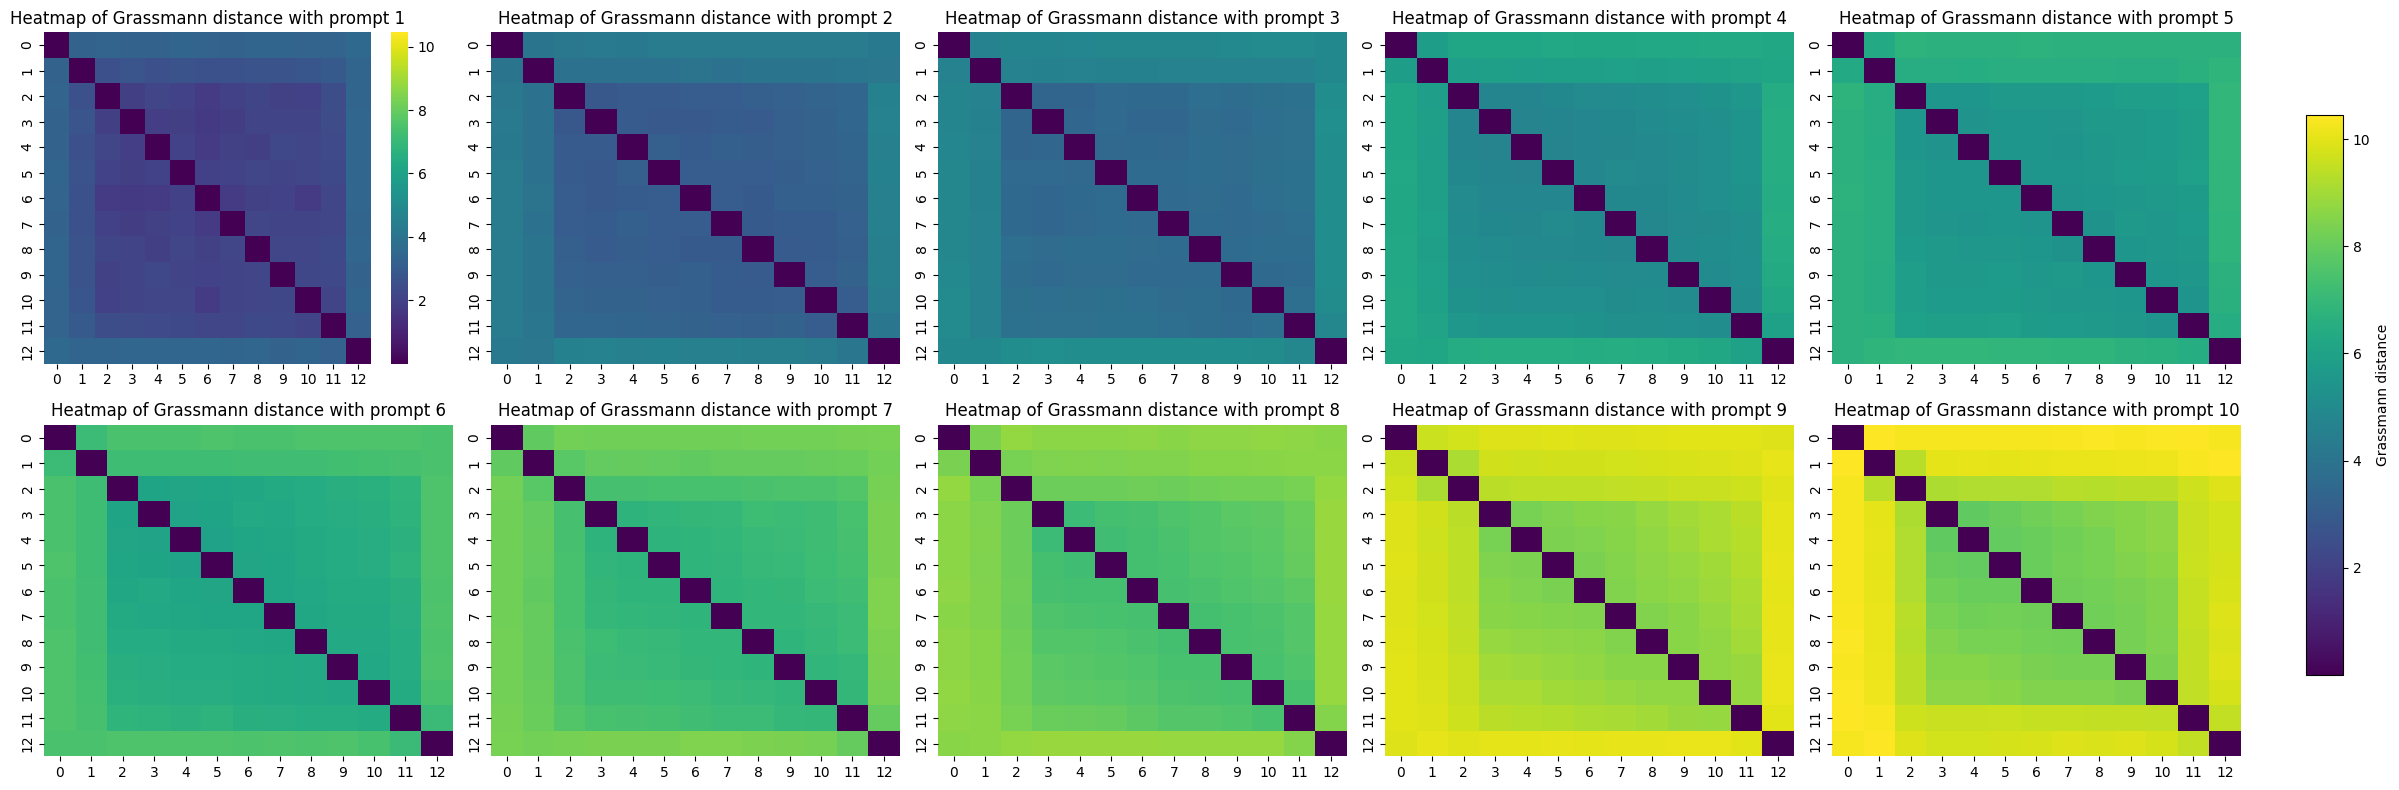

In [3]:
plot_geometry(volumes, word_counts, title="Volume over buffer states", xlabel="buffer index", ylabel="log(Volume)")
plot_geometry(gd, word_counts, title="Grassmann distance from previous buffer", xlabel="Buffer index", ylabel="Grassmann distance")
plot_geometry(cos_sim, word_counts, title="Cosine similarity with last buffer", xlabel="Buffer index", ylabel="Cosine similarity")

PCA_plot(mean_vector, word_counts, n_components=2)
PCA_plot(mean_vector, word_counts, n_components=3)

rank_plot(rank_matrix)

plot_heatmap(gd_heatmap)

## 100 to 1000 tokens prompts

In [4]:
volumes, gd, cos_sim, mean_vector, word_counts, rank_matrix = general_analysis("ai_prompts_100_to_1000_tokens.txt")
gd_heatmap = get_heatmap("ai_prompts_100_to_1000_tokens.txt")

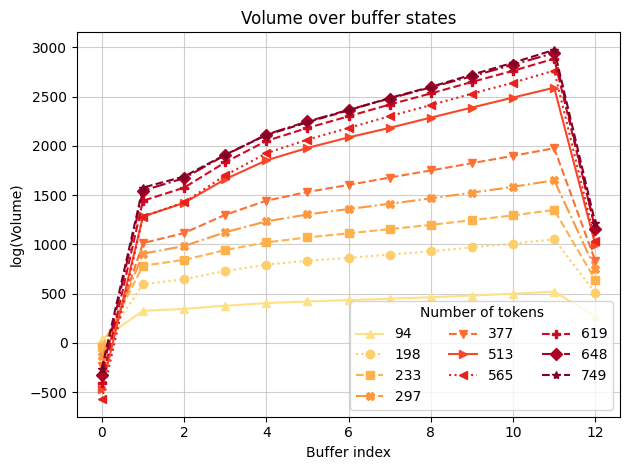

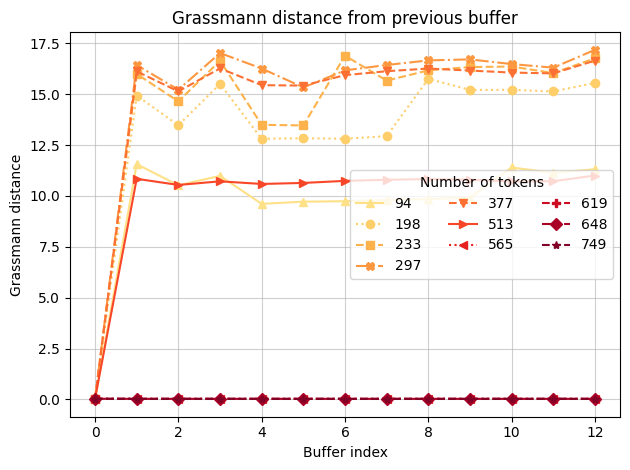

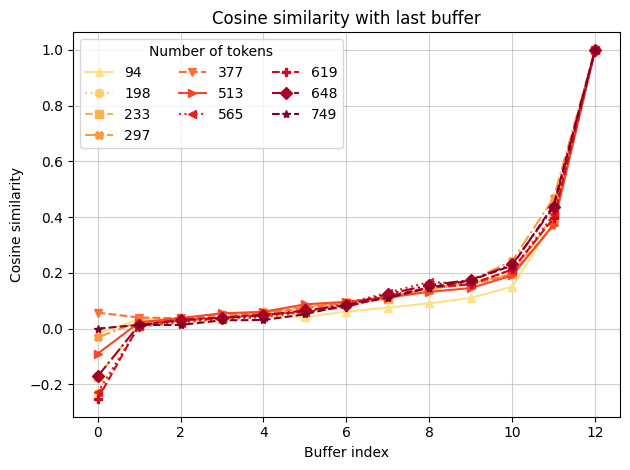

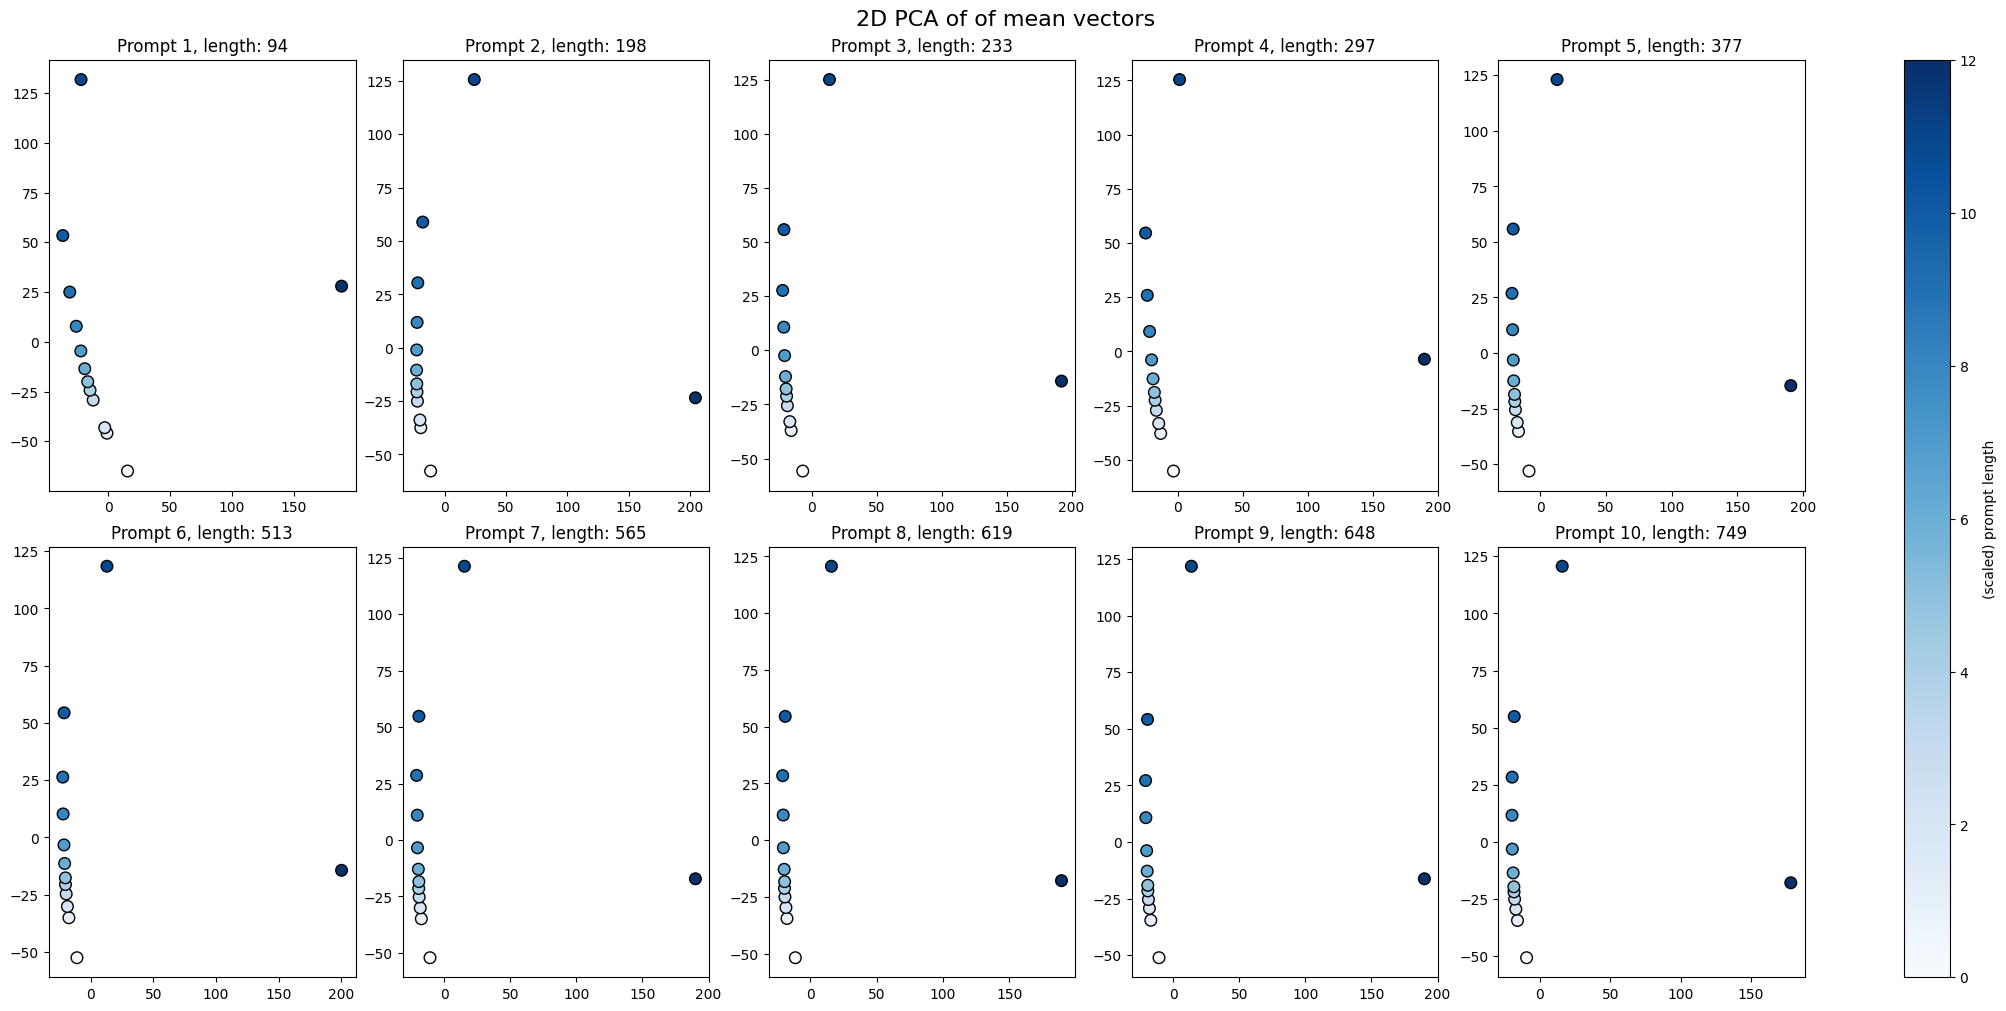

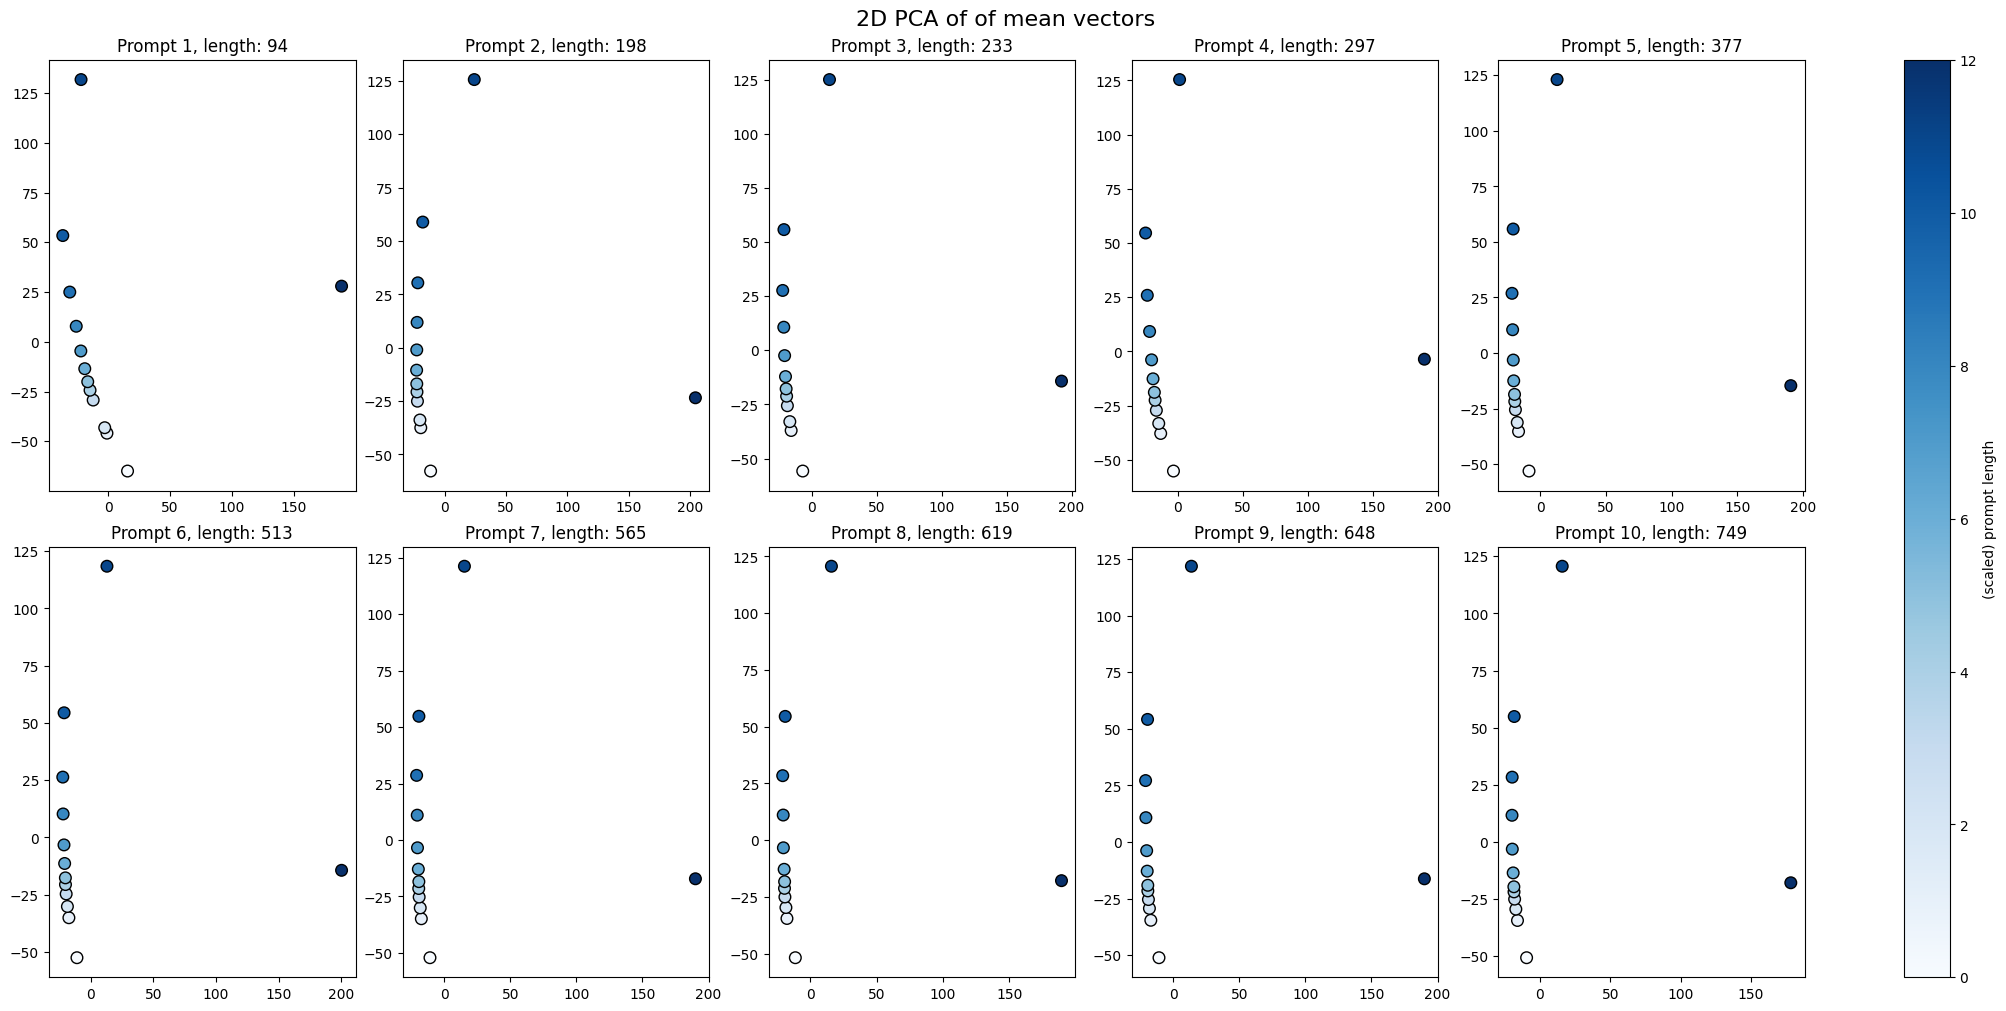

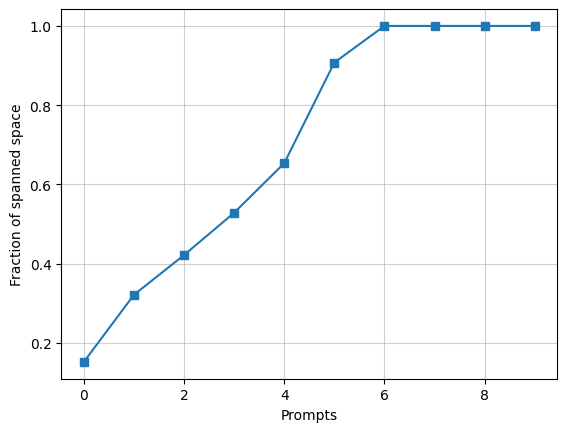

/Users/giacomogasparotto/POD/transformer_geometrical_analysis/GeometryUtils.py:284: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


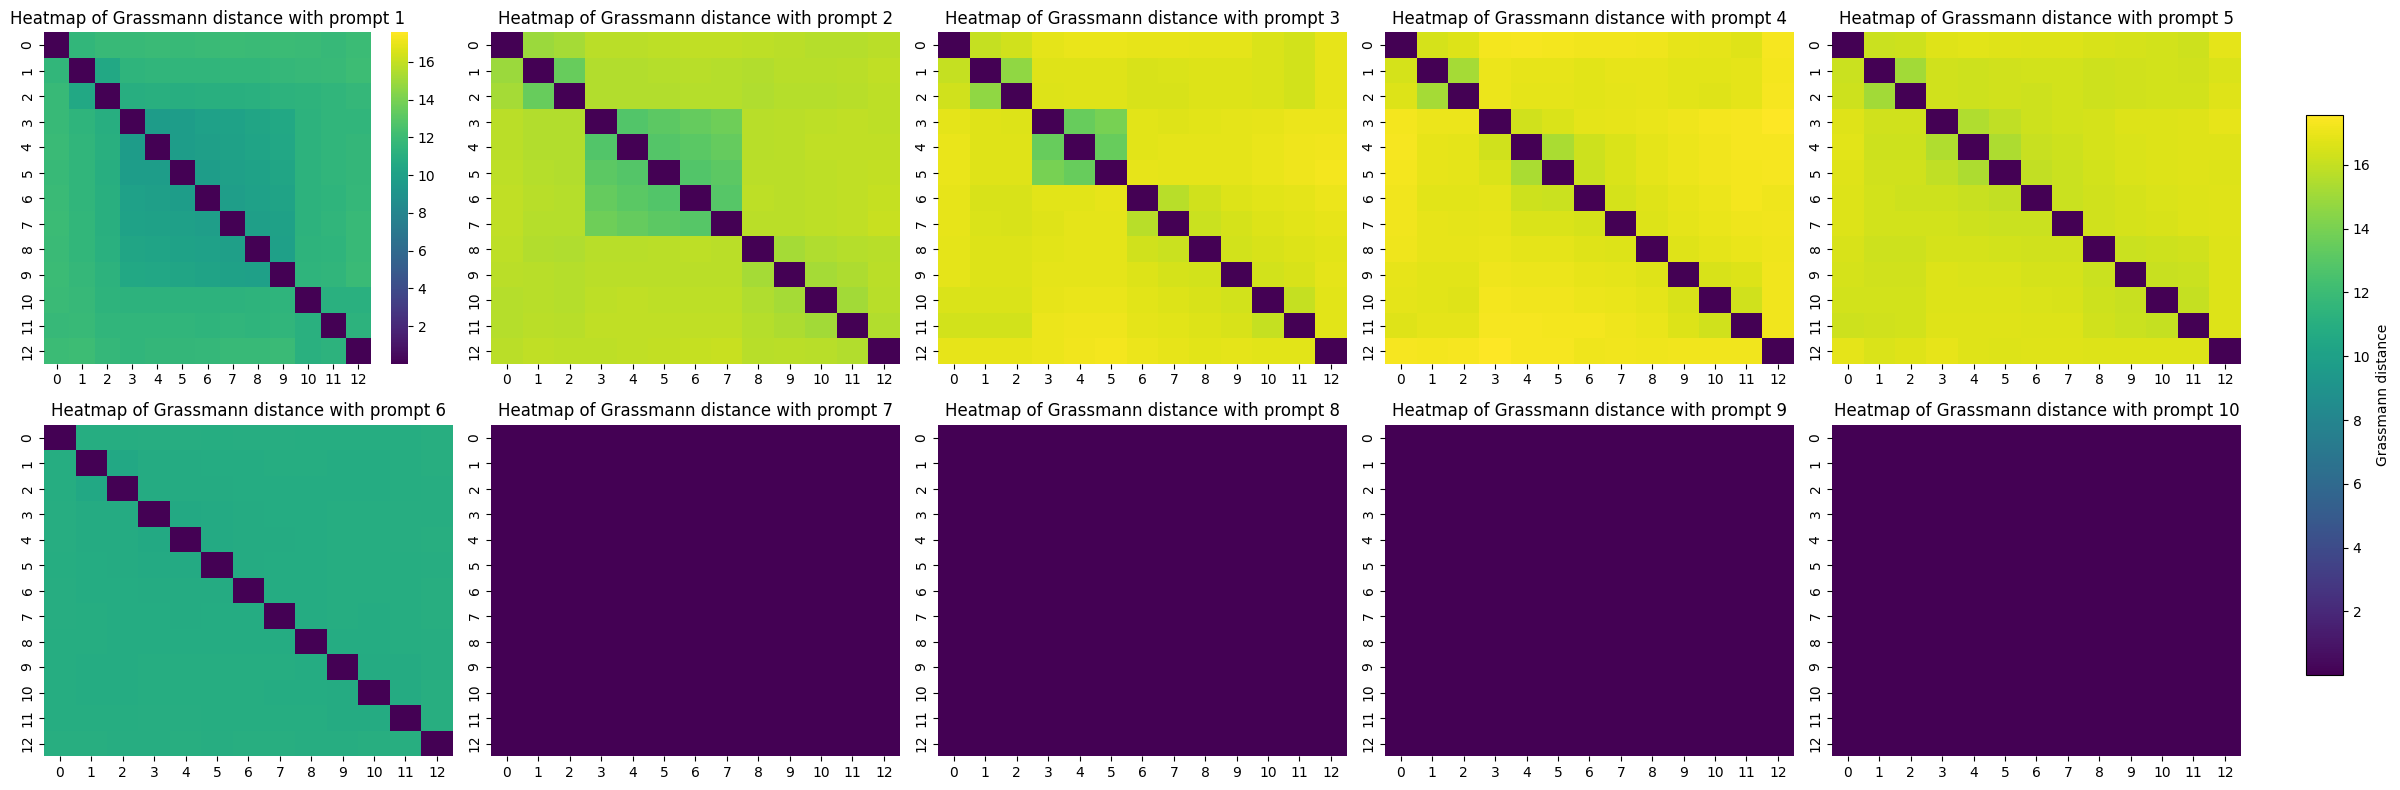

In [5]:
plot_geometry(volumes, word_counts, title="Volume over buffer states", xlabel="Buffer index", ylabel="log(Volume)")
plot_geometry(gd, word_counts, title="Grassmann distance from previous buffer", xlabel="Buffer index", ylabel="Grassmann distance")
plot_geometry(cos_sim, word_counts, title="Cosine similarity with last buffer", xlabel="Buffer index", ylabel="Cosine similarity")

PCA_plot(mean_vector, word_counts, n_components=2)
PCA_plot(mean_vector, word_counts, n_components=3)

rank_plot(rank_matrix)

plot_heatmap(gd_heatmap)

## Around 768 tokens prompts

In [6]:
volumes, gd, cos_sim, mean_vector, word_counts, rank_matrix = general_analysis("prompts_768.txt")
gd_heatmap = get_heatmap("prompts_768.txt")

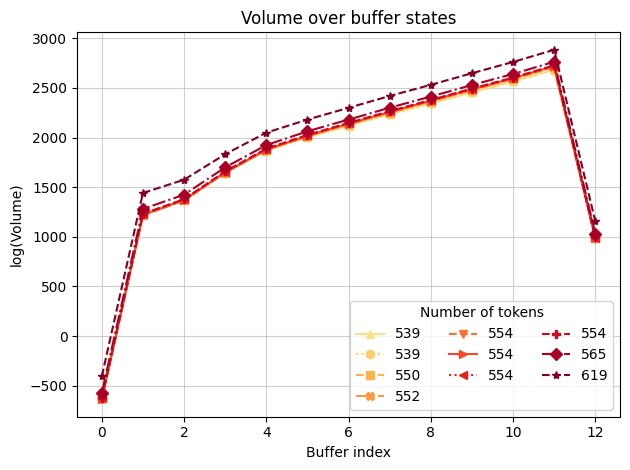

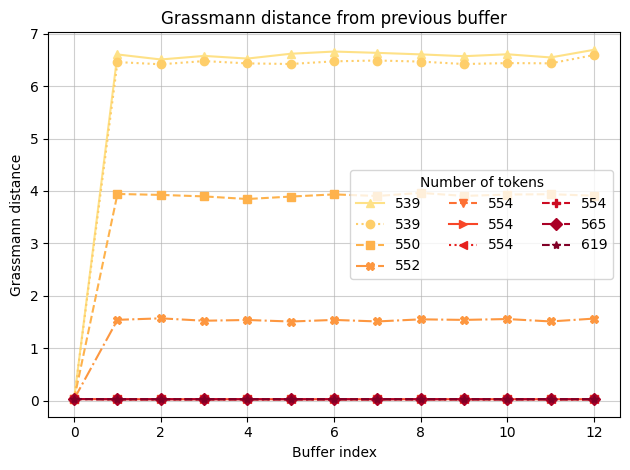

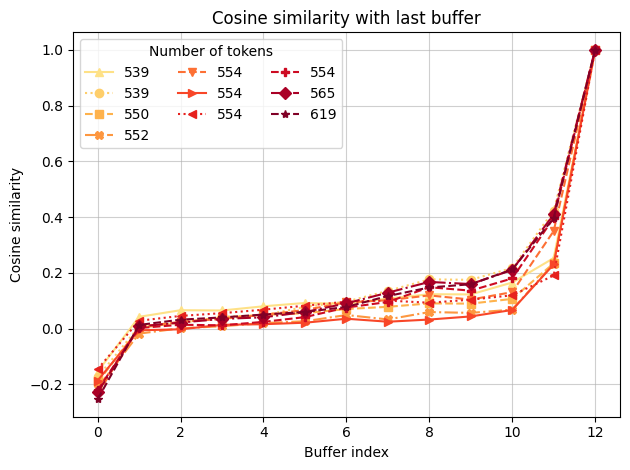

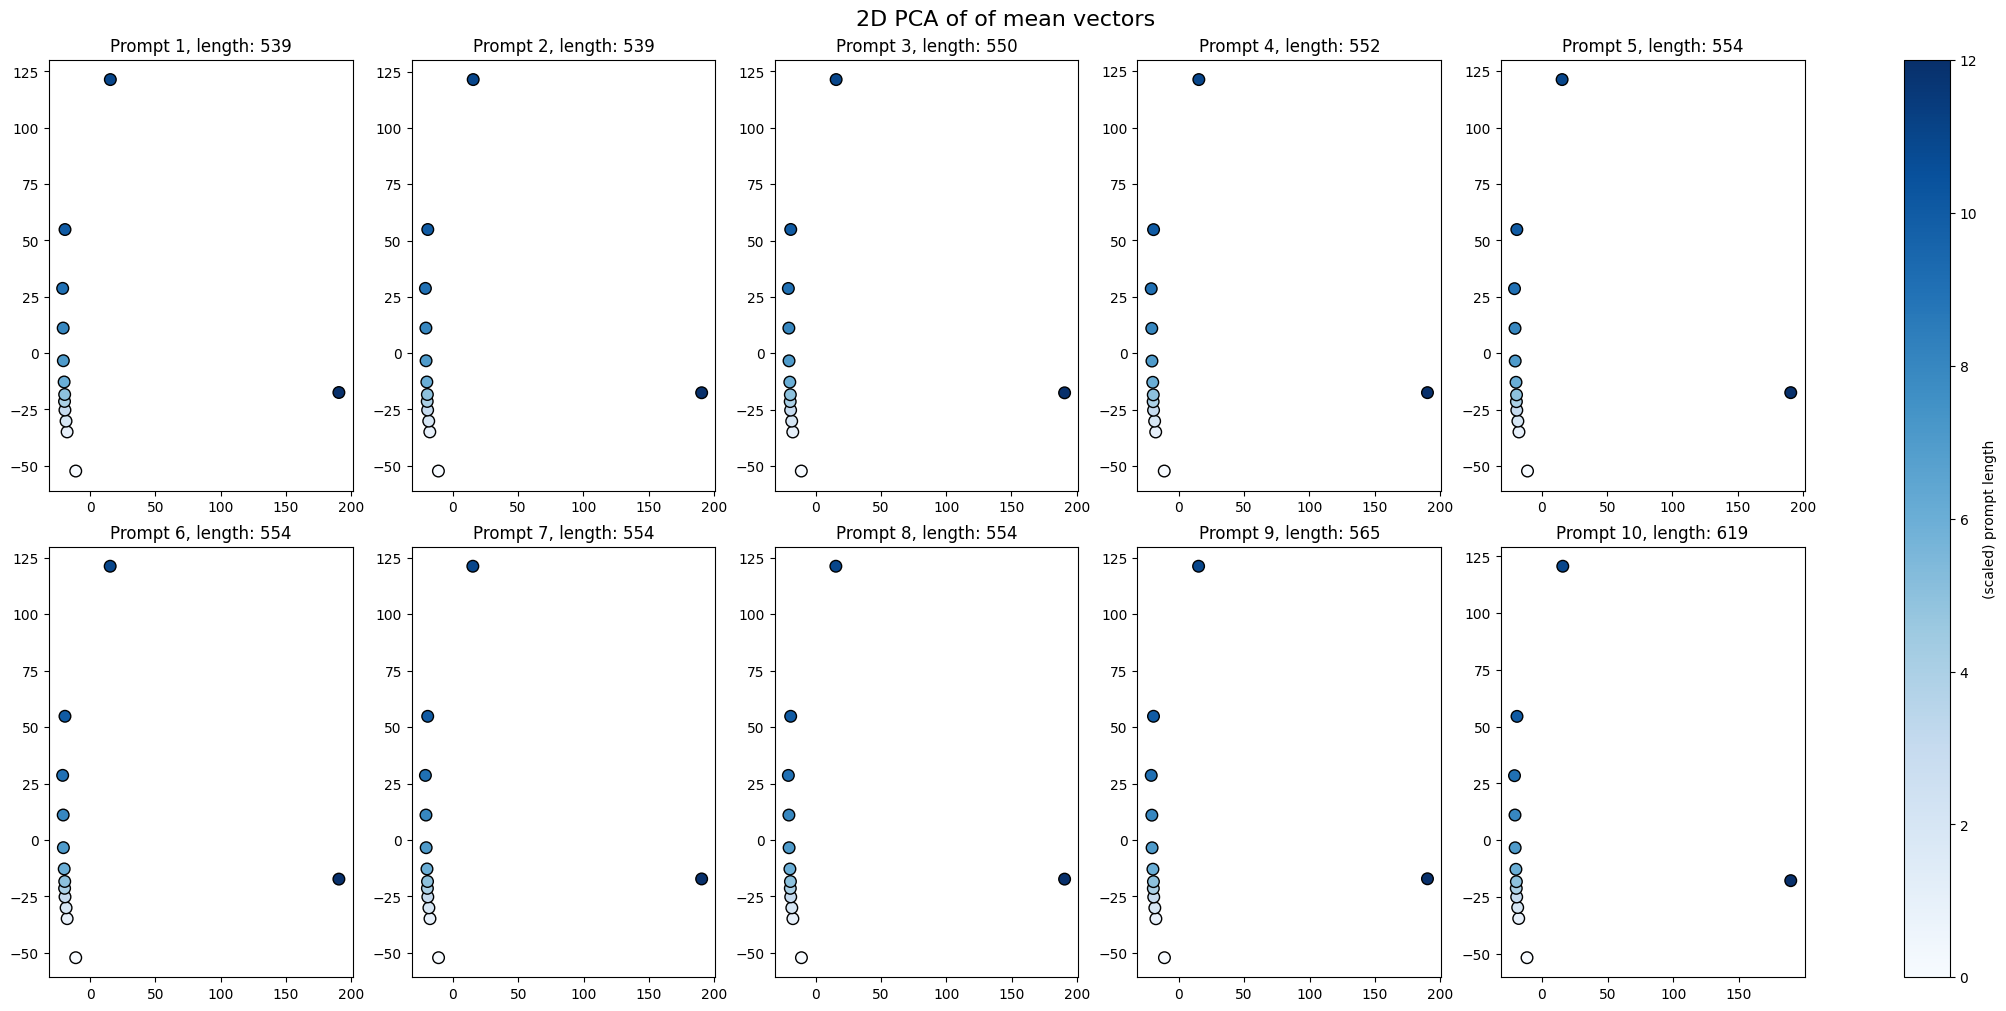

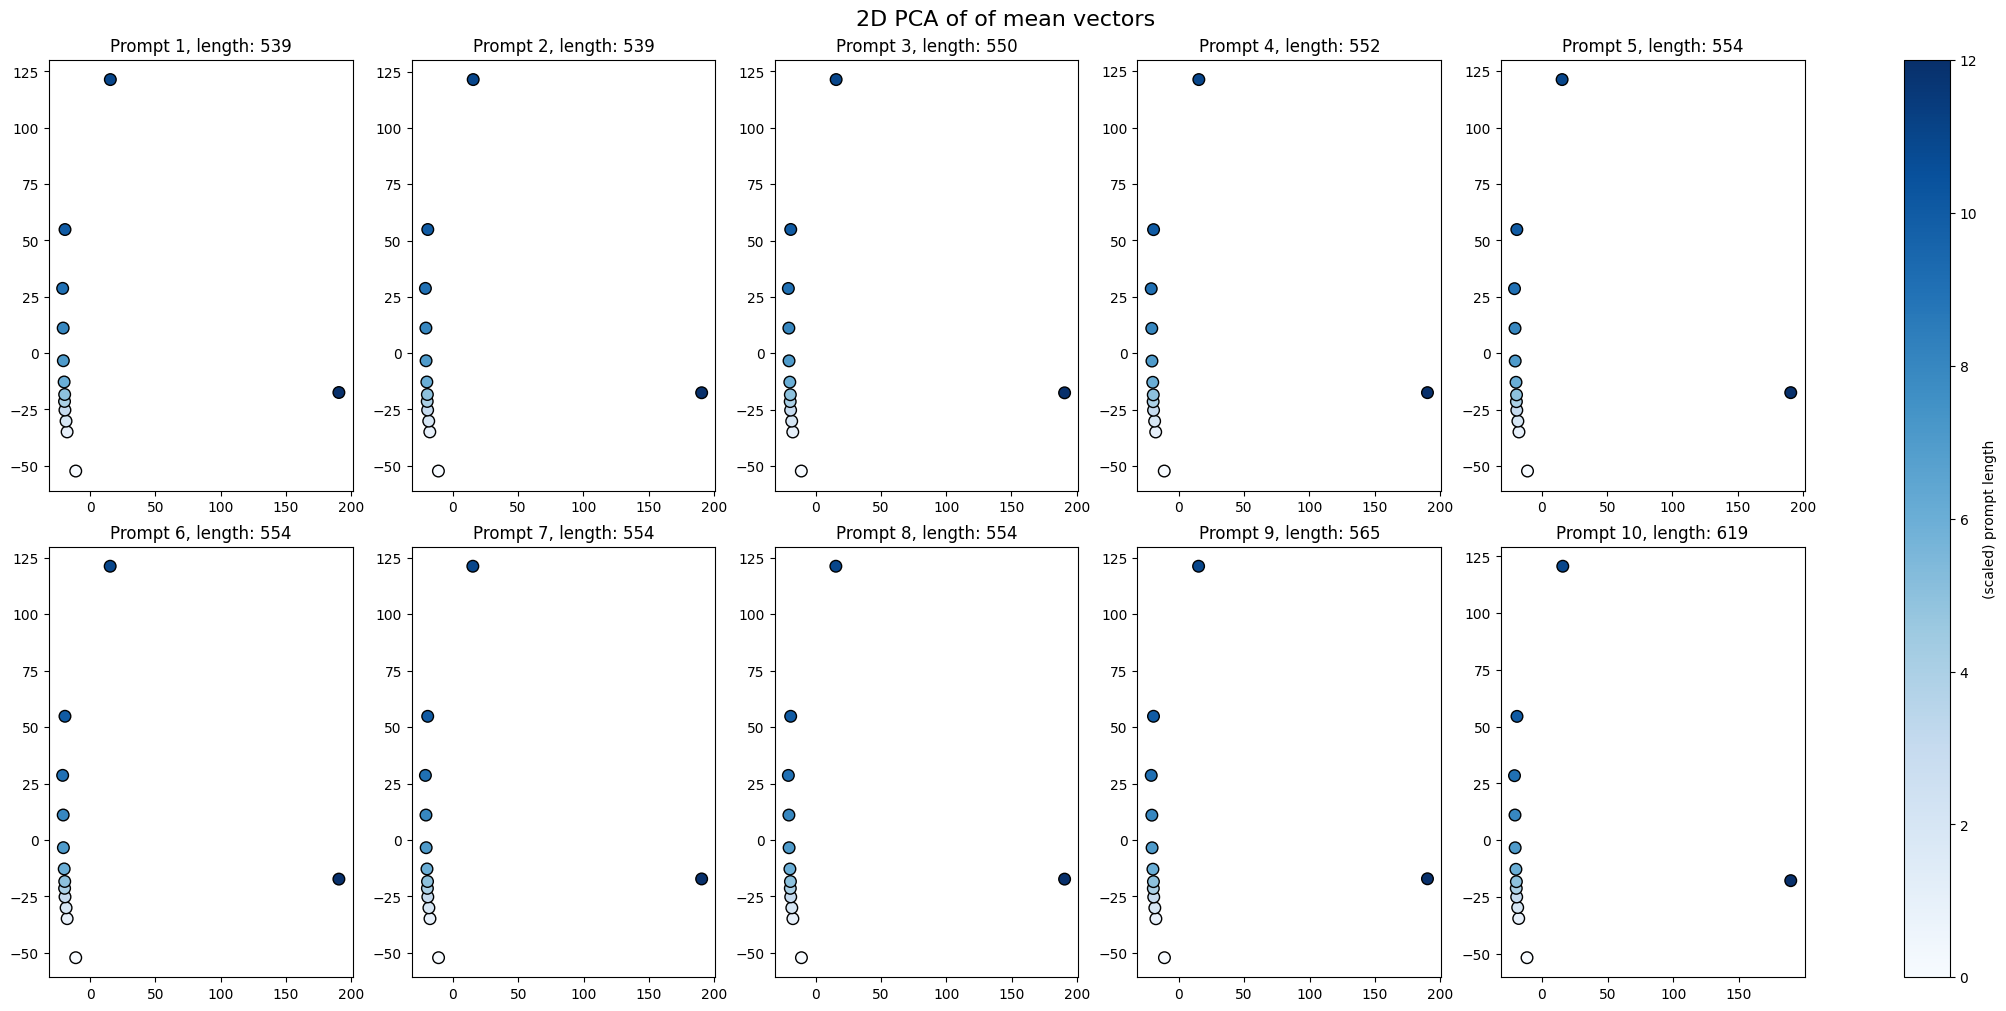

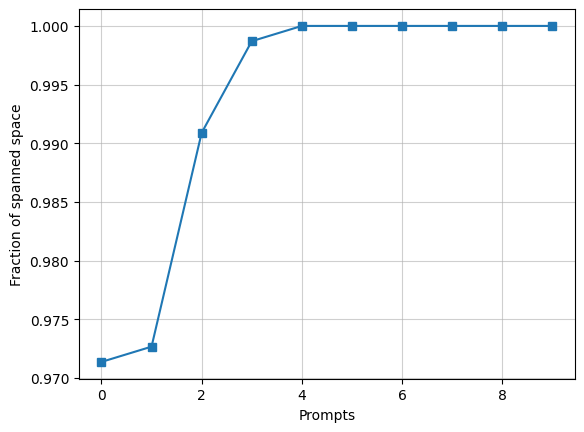

/Users/giacomogasparotto/POD/transformer_geometrical_analysis/GeometryUtils.py:284: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


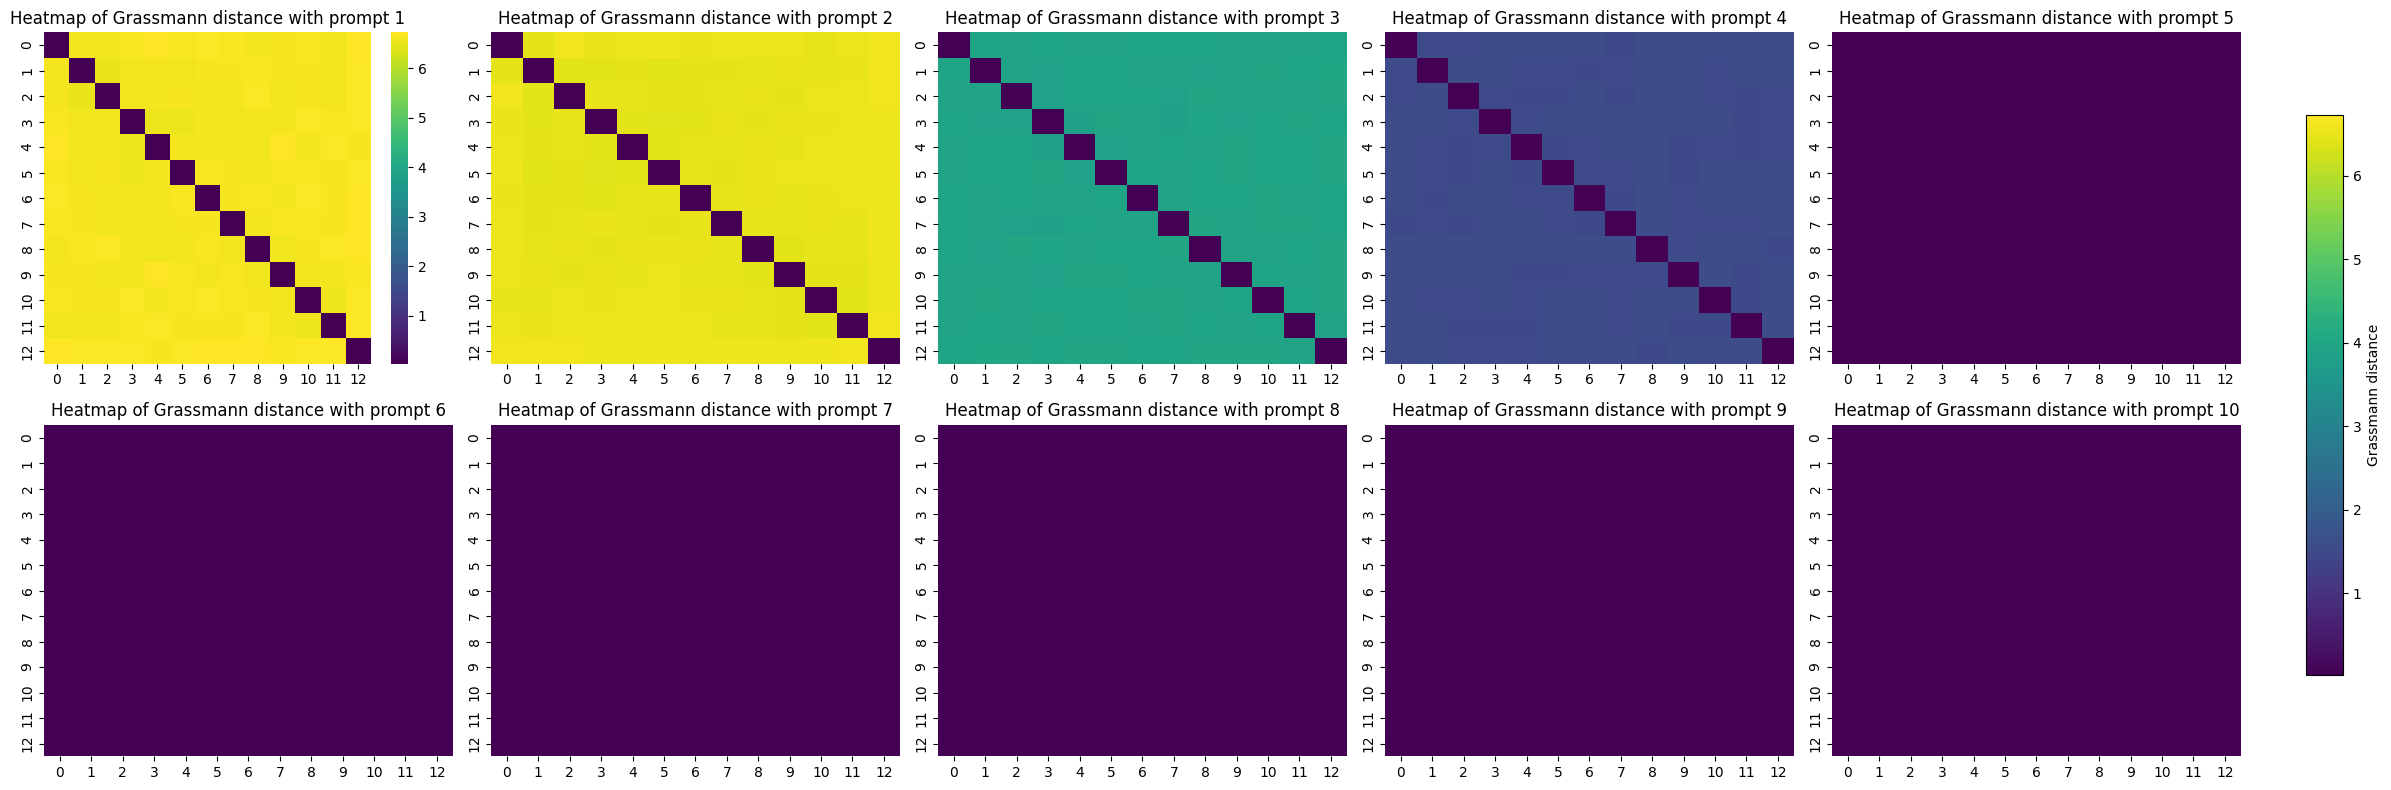

In [7]:
plot_geometry(volumes, word_counts, title="Volume over buffer states", xlabel="Buffer index", ylabel="log(Volume)")
plot_geometry(gd, word_counts, title="Grassmann distance from previous buffer", xlabel="Buffer index", ylabel="Grassmann distance")
plot_geometry(cos_sim, word_counts, title="Cosine similarity with last buffer", xlabel="Buffer index", ylabel="Cosine similarity")

PCA_plot(mean_vector, word_counts, n_components=2)
PCA_plot(mean_vector, word_counts, n_components=3)

rank_plot(rank_matrix)

plot_heatmap(gd_heatmap)

## Different context prompts

In [2]:
volumes, gd, cos_sim, mean_vector, word_counts, rank_matrix = general_analysis("different_topics_prompts.txt")
gd_heatmap = get_heatmap("different_topics_prompts.txt")

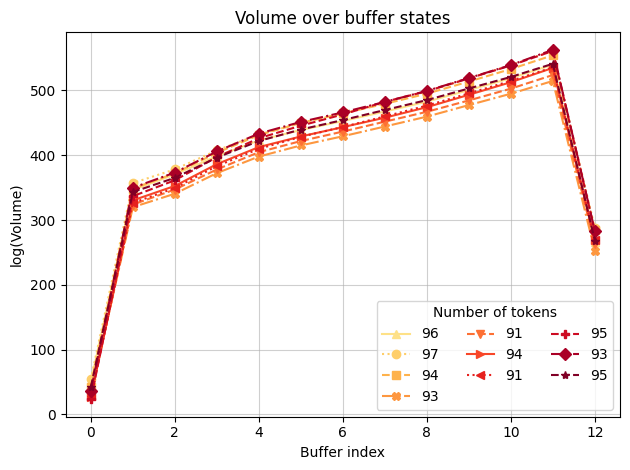

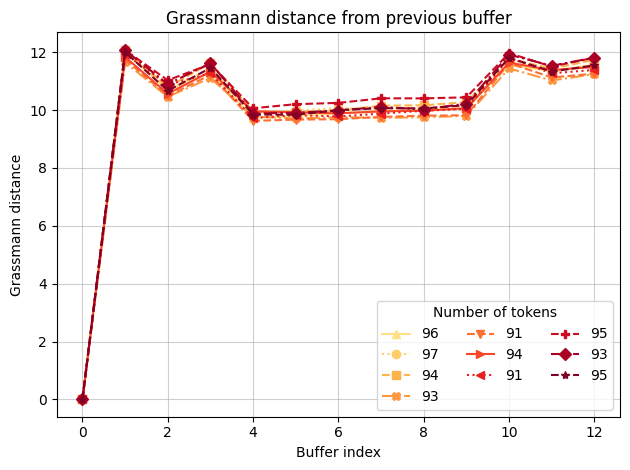

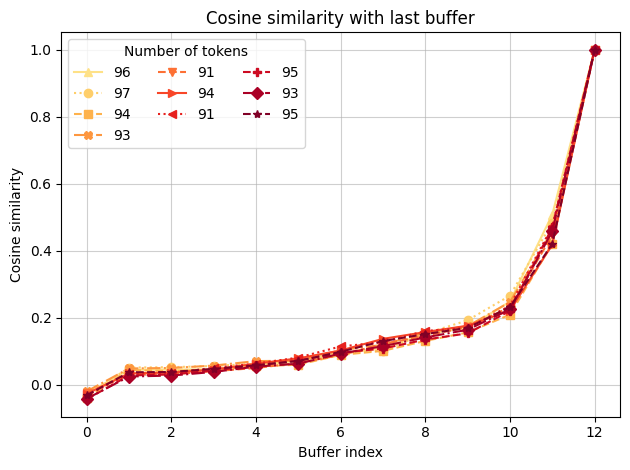

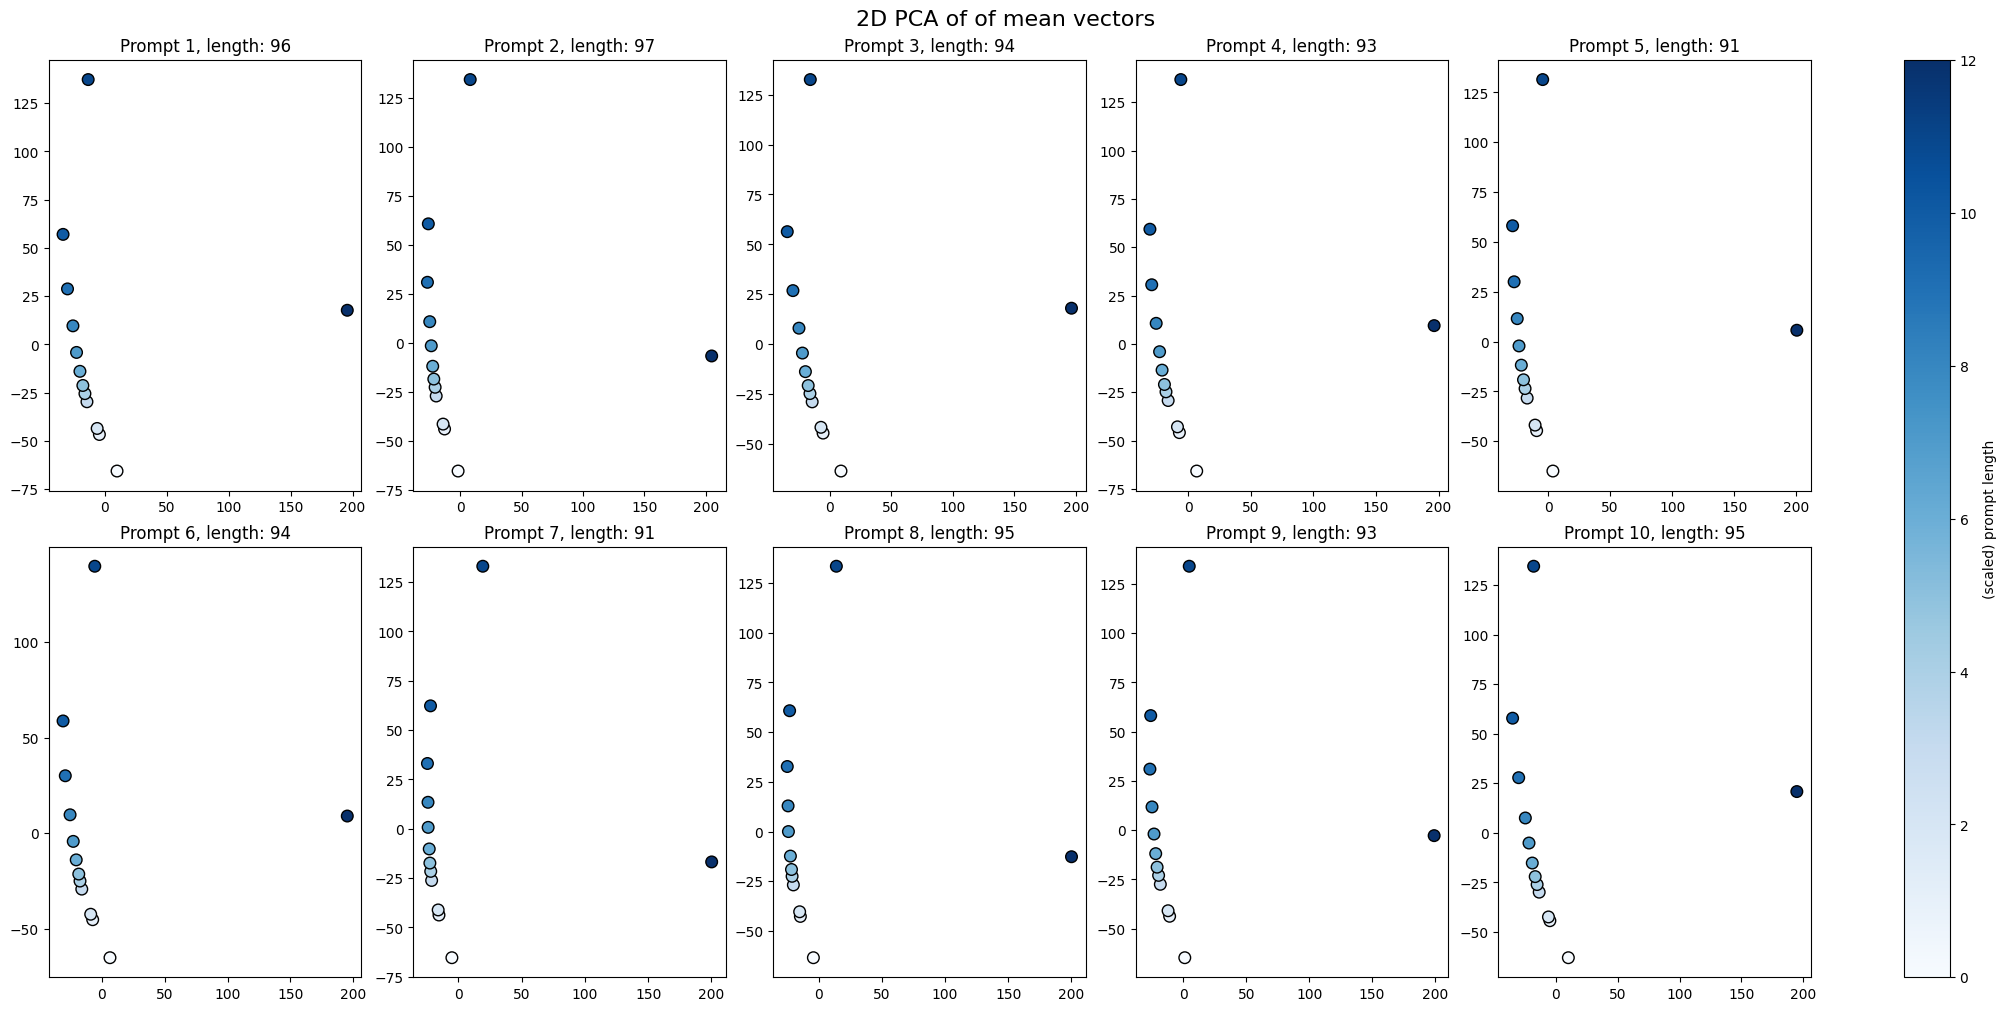

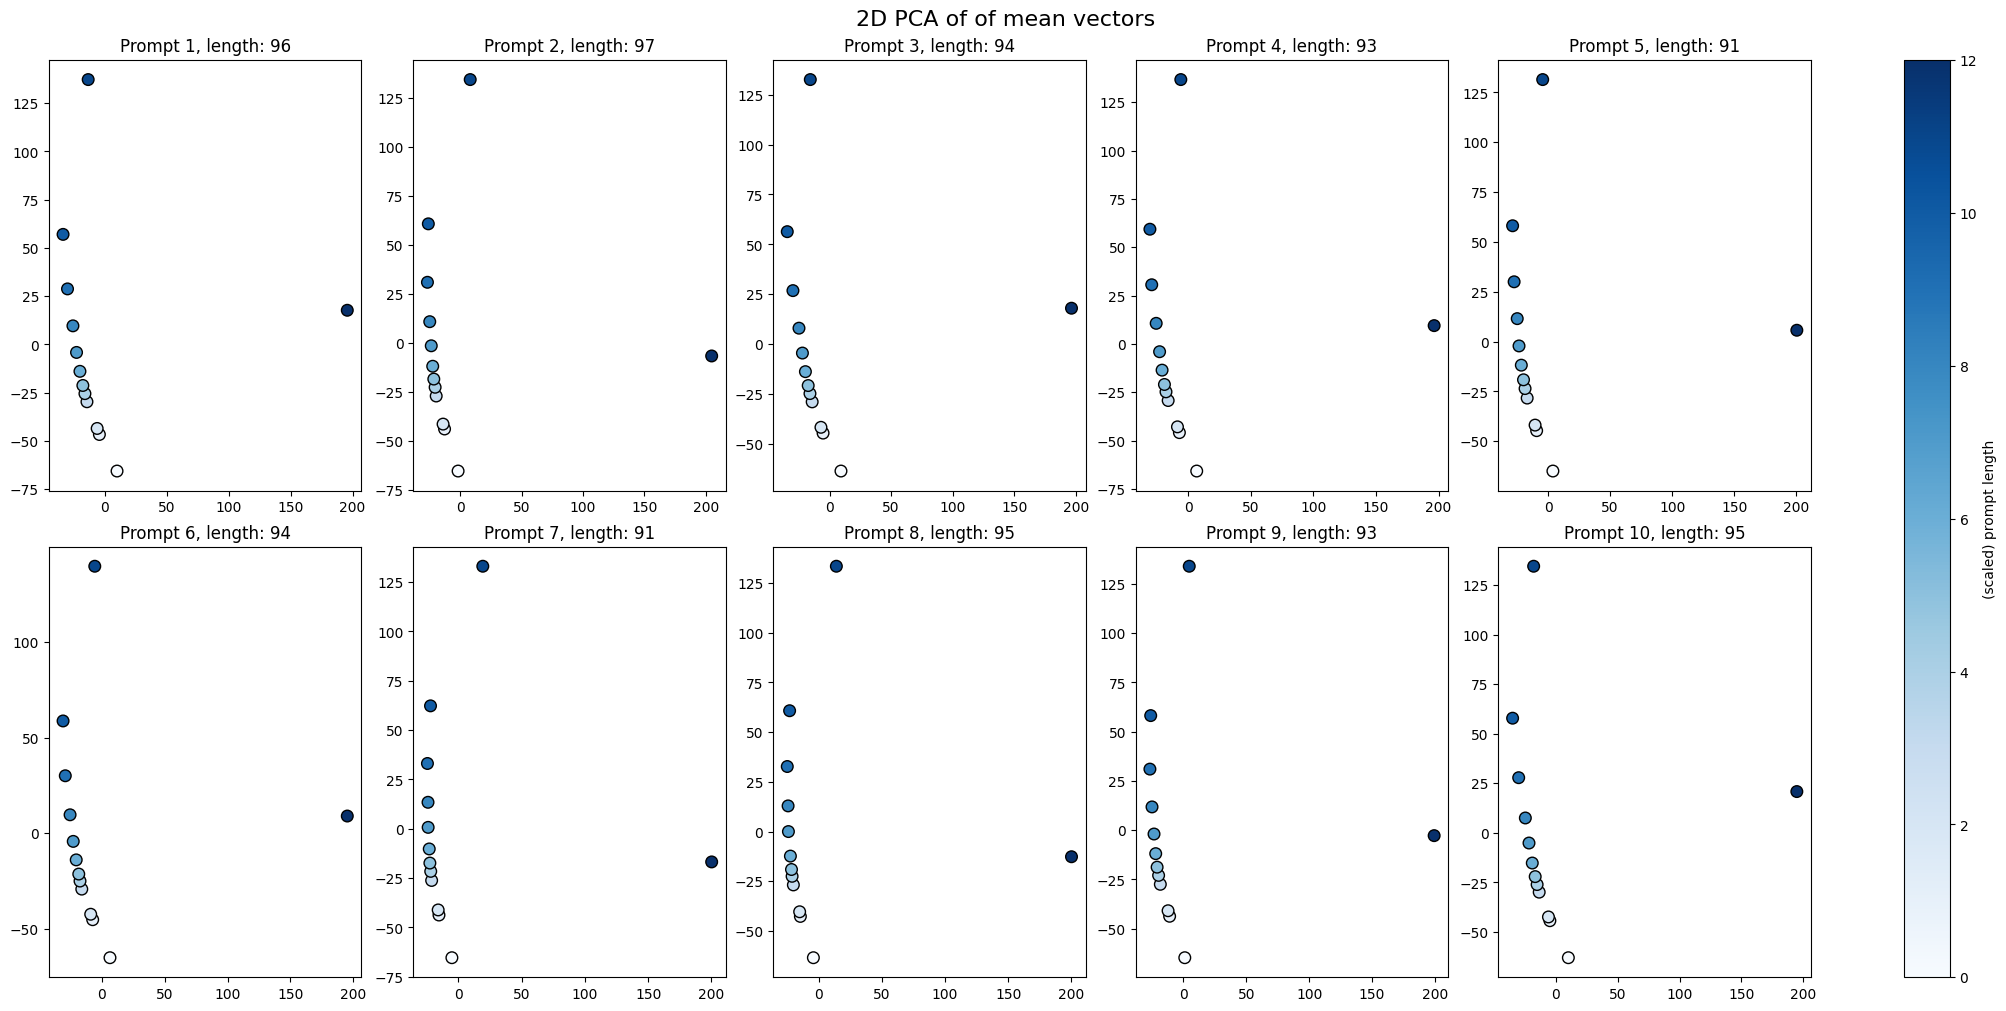

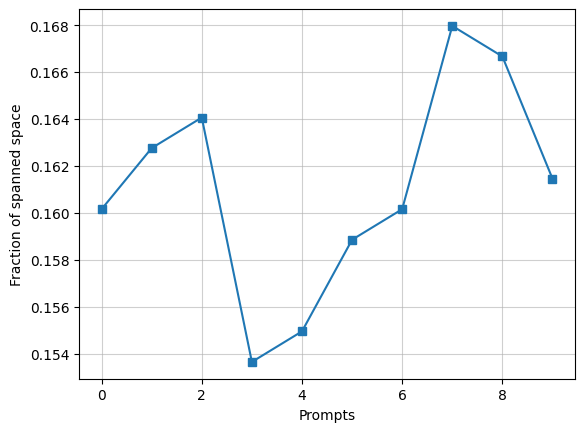

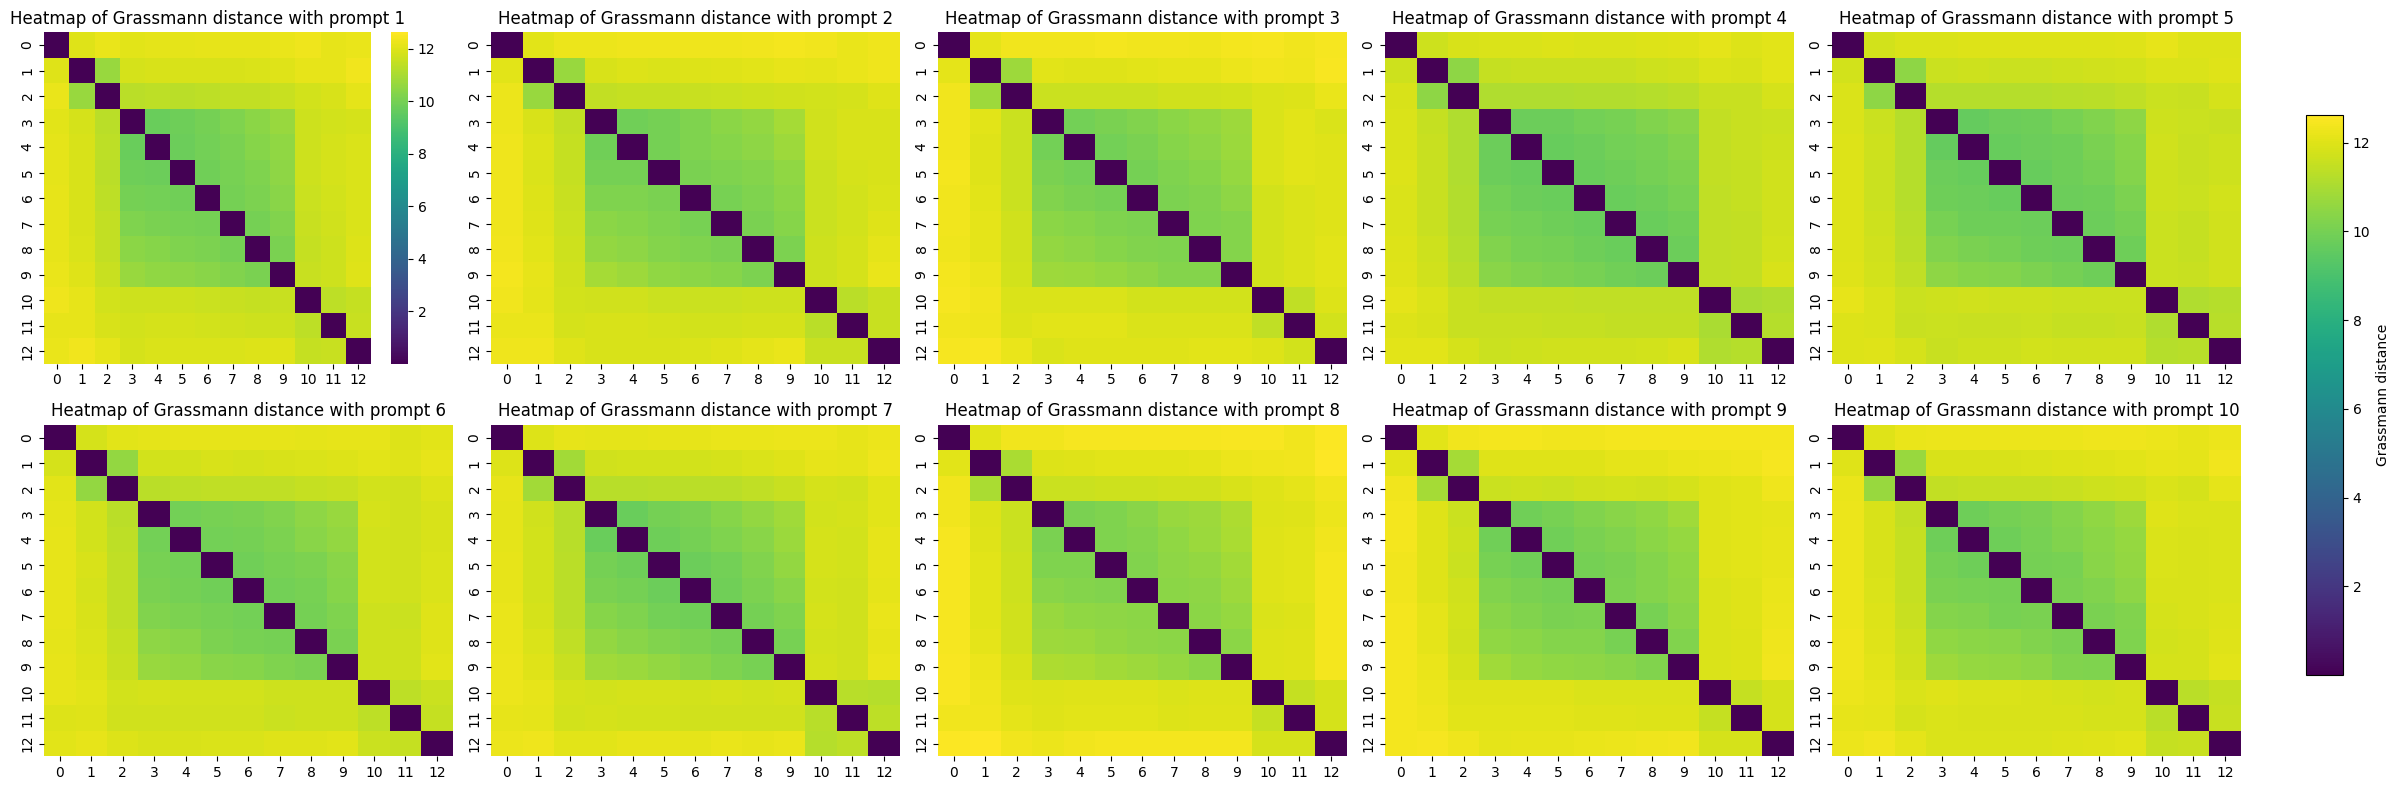

In [3]:
plot_geometry(volumes, word_counts, title="Volume over buffer states", xlabel="Buffer index", ylabel="log(Volume)")
plot_geometry(gd, word_counts, title="Grassmann distance from previous buffer", xlabel="Buffer index", ylabel="Grassmann distance")
plot_geometry(cos_sim, word_counts, title="Cosine similarity with last buffer", xlabel="Buffer index", ylabel="Cosine similarity")

PCA_plot(mean_vector, word_counts, n_components=2)
PCA_plot(mean_vector, word_counts, n_components=3)

rank_plot(rank_matrix)

plot_heatmap(gd_heatmap)

[746, 747, 761, 767, 768, 769, 770, 771, 786, 858]


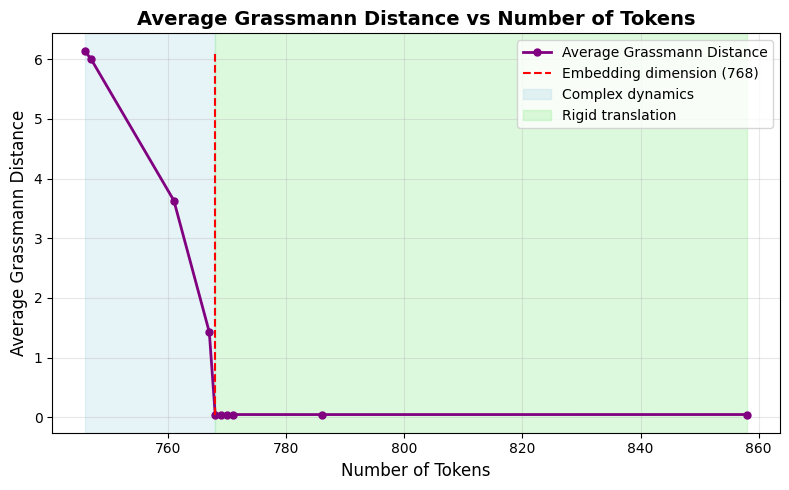

In [4]:
# Read prompts from file
with open("prompts_768.txt", "r") as f:
    prompts = [line.strip() for line in f.readlines() if line.strip()]

gd_heatmap = []
# Loop over the prompts
for p in prompts:
    # Define matrices to store the results for each prompt
    single_gd_heatmap = np.zeros((13,13))
    # Get the buffer state 
    buffer_states = get_buffer_states(p)

    # Loop over buffer steps
    for i in range(buffer_states.shape[0]):
        # Initial Grassmann reference buffer (from first step)
        buffer_scaled_0 = buffer_states[i,:,:] - np.mean(buffer_states[i,:,:], axis=0, keepdims=True)
        U, S, Vt = la.svd(buffer_scaled_0, lapack_driver='gesvd')
        eigenvalues = S**2
        explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
        n_components = np.argmax(np.cumsum(explained_variance_ratio) >= 0.9)+1
        
        #Low rank approximation
        U_reduced = U[:, :n_components]
        S_reduced = np.diag(S[:n_components])
        Vt_reduced = Vt[:n_components, :]
        buffer_reduced_0 = np.dot(np.dot(U_reduced, S_reduced), Vt_reduced)
        for j in range(buffer_states.shape[0]):
            bg = BufferGeometry(buffer_states[j, :, :])
            
            # Reduce current buffer
            buffer_scaled = buffer_states[j,:,:] - np.mean(buffer_states[j,:,:], axis=0, keepdims=True)
            U, S, Vt = la.svd(buffer_scaled, lapack_driver='gesvd')
            eigenvalues = S**2
            explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
            n_components = np.argmax(np.cumsum(explained_variance_ratio) >= 0.9)+1
            
            # Low rank approximation   
            U_reduced = U[:, :n_components]
            S_reduced = np.diag(S[:n_components])
            Vt_reduced = Vt[:n_components, :]
            buffer_reduced = np.dot(np.dot(U_reduced, S_reduced), Vt_reduced)

            # ===== GRASSMANN DISTANCE =====
            bg_reduced = BufferGeometry(buffer_reduced)
            single_gd_heatmap[i,j] = bg_reduced.grassmann_distance(buffer_reduced_0)
    
    # append heatmap matrix for that prompt
    gd_heatmap.append(single_gd_heatmap)


gd_heatmap = np.array(gd_heatmap)

with open("prompts_768.txt", "r") as f:
    prompts = [line.strip() for line in f.readlines() if line.strip()]


token_counts = [len(tokenizer.tokenize(p)) for p in prompts]

print(token_counts)

gd_avg = np.mean(gd_heatmap, axis=(1,2))

plt.figure(figsize=(8,5))
plt.plot(token_counts, gd_avg, marker='o', linestyle='-', color='purple', linewidth=2, markersize=5, label = 'Average Grassmann Distance')
plt.title('Average Grassmann Distance vs Number of Tokens', fontsize=14, fontweight='bold')
plt.xlabel('Number of Tokens', fontsize=12)
plt.ylabel('Average Grassmann Distance', fontsize=12)
plt.grid(alpha=0.3)

# Vertical line at 768
plt.vlines(ymax = np.max(gd_avg), ymin = np.min(gd_avg), x = 768, linestyle = 'dashed', color = 'red', label = 'Embedding dimension (768)')

# Shaded regions
plt.axvspan(min(token_counts), 768, color='lightblue', alpha=0.3, label='Complex dynamics')
plt.axvspan(768, max(token_counts), color='lightgreen', alpha=0.3, label='Rigid translation')

plt.legend()
plt.tight_layout()
plt.show()